# Imports

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib.animation import FuncAnimation

# Implementation of the model

In [2]:
class FreewayTraffic:
    def __init__(self, L, max_v, p, rho):
        self.L = L
        self.max_v = max_v
        self.p = p
        n_cars = int(rho * L)
        vels = (max_v * np.random.random(n_cars)).astype(int)
        env = np.append(np.full(n_cars, 1),
                        np.full(L - n_cars, 0))
        np.random.shuffle(env)
        self.pos = np.zeros((n_cars, 2))
        self.pos[:, 0] = np.where(env > 0)[0]
        self.pos[:, 1] = vels
        self.history = [self.pos.copy()]
    
    def get_distance(self):
        return np.append(self.pos[1:, 0] - self.pos[:-1, 0] - 1, np.asarray([self.L - self.pos[-1, 0] + self.pos[0, 0] - 1]))
        
    def move(self):
        self.pos[:, 1][self.pos[:, 1] < self.max_v] += 1
        dist = self.get_distance()
        too_close = (dist < self.pos[:, 1])
        self.pos[:, 1] = dist * too_close + self.pos[:, 1] * (1 - too_close)
        g_1 = (self.pos[:, 1] > 0)
        self.pos[g_1, 1] -= (np.random.random(sum(g_1)) < self.p)
        self.pos[:, 0] += self.pos[:, 1]
        self.pos[:, 0] %= self.L
        self.pos = self.pos[self.pos[:,0].argsort()]
        self.history.append(self.pos.copy())
        
    def simulate(self, n=100):
        for i in range(n):
            self.move()

In [292]:
def get_views(hist, M=100, L=100):
    M = len(hist.history)
    res = np.zeros((M, L))
    res[:, :] = -1
    for i in range(M):
        res[i, hist.history[i][:, 0].astype(int)] = hist.history[i][:, 1].astype(int)
    return res

In [332]:
res_full = []
rhos = [.1, .3, .6]
ps = [0, .3, .6]
for i in rhos:
    for j in ps:
        temp = FreewayTraffic(L = 100, max_v = 5, p = j, rho = i)
        temp.simulate(100)
        res_full.append(get_views(temp, M=M, L=100))

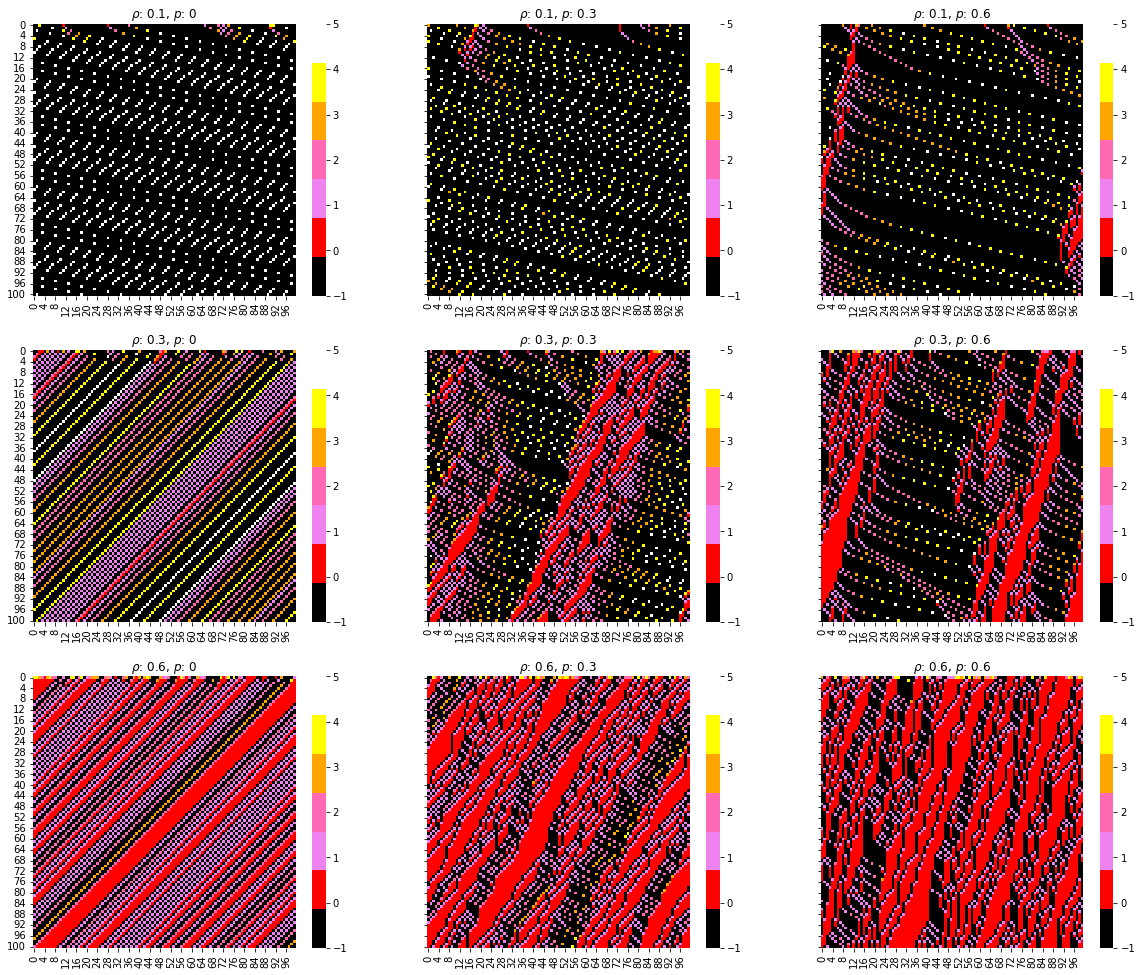

In [333]:
fig, axes = plt.subplots(3, 3, figsize=(20, 17), sharey='row')
for i in range(len(res_full)):
    sns.heatmap(res_full[i], vmin=-1, vmax=5, cmap=['black', 'red', 'violet', 'hotpink', 'orange', 'yellow', 'white'], ax=axes[i//3,i%3])
    axes[i//3,i%3].set_title(f'$\\rho$: {rhos[i//3]}, $p$: {ps[i%3]}')
plt.show()

In [6]:
M = 100
n = 100
rhos = np.arange(0.05,1.01,.05)
ps = [0, .3, .6]
mean_for_ps = []
for i in ps:
    for_ps_temp = []
    for j in rhos:
        mean_temp = 0
        print(i,j)
        for _ in range(M):
            temp = FreewayTraffic(L = 100, max_v = 5, p = i, rho = j)
            temp.simulate(n)
            mean_temp += temp.history[-1][:, 1].mean()
        for_ps_temp.append(mean_temp / M)
    mean_for_ps.append(for_ps_temp)

0 0.05
0 0.1
0 0.15000000000000002
0 0.2
0 0.25
0 0.3
0 0.35000000000000003
0 0.4
0 0.45
0 0.5
0 0.55
0 0.6000000000000001
0 0.6500000000000001
0 0.7000000000000001
0 0.7500000000000001
0 0.8
0 0.8500000000000001
0 0.9000000000000001
0 0.9500000000000001
0 1.0
0.3 0.05
0.3 0.1
0.3 0.15000000000000002
0.3 0.2
0.3 0.25
0.3 0.3
0.3 0.35000000000000003
0.3 0.4
0.3 0.45
0.3 0.5
0.3 0.55
0.3 0.6000000000000001
0.3 0.6500000000000001
0.3 0.7000000000000001
0.3 0.7500000000000001
0.3 0.8
0.3 0.8500000000000001
0.3 0.9000000000000001
0.3 0.9500000000000001
0.3 1.0
0.6 0.05
0.6 0.1
0.6 0.15000000000000002
0.6 0.2
0.6 0.25
0.6 0.3
0.6 0.35000000000000003
0.6 0.4
0.6 0.45
0.6 0.5
0.6 0.55
0.6 0.6000000000000001
0.6 0.6500000000000001
0.6 0.7000000000000001
0.6 0.7500000000000001
0.6 0.8
0.6 0.8500000000000001
0.6 0.9000000000000001
0.6 0.9500000000000001
0.6 1.0


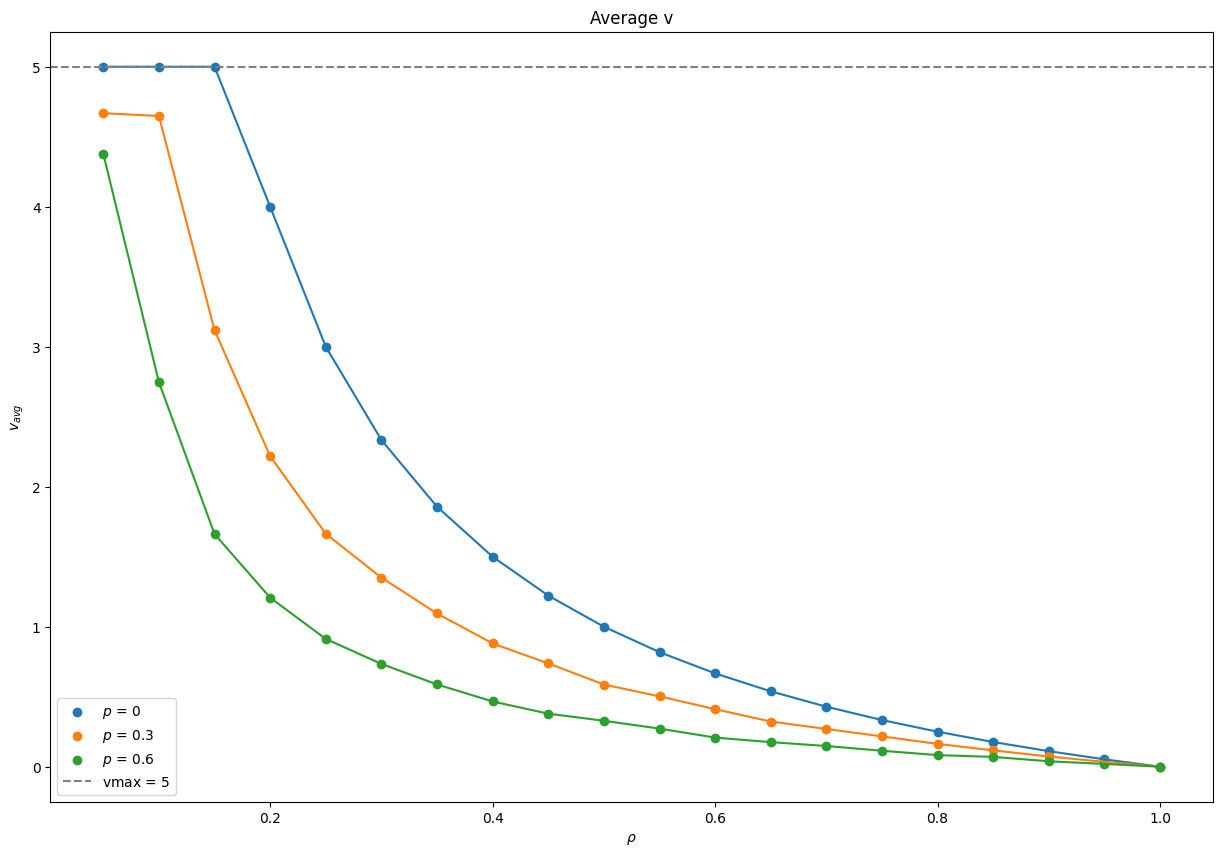

In [7]:
plt.figure(figsize=(15,10))
for i in range(len(mean_for_ps)):
    plt.scatter(rhos, mean_for_ps[i], label=f'$p$ = {ps[i]}')
    plt.plot(rhos, mean_for_ps[i])
plt.axhline(y=5, label='vmax = $5$', color='gray', linestyle='--')
plt.legend()
plt.xlabel('$\\rho$')
plt.ylabel('$v_{avg}$')
plt.title('Average v')
plt.show()

In [3]:
class FreewayTrafficTwoLines:
    def __init__(self, L, max_v, p, rho):
        self.L = L
        self.max_v = max_v
        self.p = p
        n_cars = int(rho * 2*L)
        env = np.append(np.full(n_cars, 1),
                        np.full(2*L - n_cars, 0))
        np.random.shuffle(env)
        env = env.reshape((2, L))
        self.pos = self.get_pos(env)
        self.history = [self.pos.copy()]
        
    def get_pos(self, env):
        pos = np.zeros((env.sum(), 4))
        n_cars = [0, env[0, :].sum(), env.sum()]
        for i in range(env.shape[0]):
            pos[n_cars[i]:n_cars[i+1], 0] = i
            pos[n_cars[i]:n_cars[i+1], 1] = np.where(env[i, :] > 0)[0]
            pos[n_cars[i]:n_cars[i+1], 2] = (self.max_v * np.random.random(n_cars[i+1] - n_cars[i])).astype(int)
        return pos
    
    def get_distance_same(self):
        self.pos = self.pos[np.lexsort((self.pos[:, 1], self.pos[:,0]))]
        for i in range(2):
            line = self.pos[self.pos[:, 0] == i, :].copy()
            if len(line) == 0:
                continue
            self.pos[self.pos[:, 0] == i, 3] = np.append(line[1:, 1] - line[:-1, 1] - 1, 
                                                         np.asarray([self.L - line[-1, 1] + line[0, 1] - 1]))
    
    def get_distance(self):
        self.get_distance_same()
        new_pos = self.pos.copy()
        for i in range(2):
            line_pos = np.where((self.pos[:, 3] < self.pos[:, 2]) & (self.pos[:, 0] == i))[0]
            other = self.pos[np.where(self.pos[:, 0] == ((i-1) * (-1)))[0], 1]
            if len(line_pos) == 0:
                continue
            if len(other) == 0:
                for car in line_pos:
                    new_pos[car, 0] = int((-1) * (self.pos[car, 0] - 1))
            else:
                for car in line_pos:
                    pos = self.pos[car, 1]
                    v = self.pos[car, 2]
                    dist = self.pos[car, 3]
                    front = min(other[other >= pos]) - pos if max(other) > pos else  self.L - pos + min(other)
                    back = pos - max(other[other < pos]) - 1 if min(other) < pos else  self.L - max(other) + pos - 1
                    # we don't know the other cars' vs so we assume that the one behind us has v=max_v and the one ahead has v=0
                    goes = min(front, v) - 1 #because one move is switching lines
                    can_go = (back - self.max_v + goes) >= 0
                    if can_go and (goes > dist):
                        new_pos[car, 0] = int((-1) * (self.pos[car, 0] - 1))
        self.pos = new_pos
        self.get_distance_same()
        
    def move(self):
        self.pos[:, 2][self.pos[:, 2] < self.max_v] += 1
        
        self.get_distance()
        
        too_close = (self.pos[:, 3] < self.pos[:, 2])
        self.pos[:, 2] = self.pos[:, 3] * too_close + self.pos[:, 2] * (1 - too_close)
        
        g_1 = (self.pos[:, 2] > 0)
        self.pos[g_1, 2] -= (np.random.random(sum(g_1)) < self.p)
        
        self.pos[:, 1] += self.pos[:, 2]
        self.pos[:, 1] %= self.L
        
        self.pos = self.pos[np.lexsort((self.pos[:, 1], self.pos[:,0]))]
        self.history.append(self.pos.copy())
        
    def simulate(self, n=100):
        for i in range(n):
            self.move()

In [4]:
def get_views_two(traffic, M=100, L=100):
    hist = []
    for i in traffic.history:
        temp = np.zeros((2, L))
        temp[:,:] = -1
        for j in range(2):
            temp[j, i[i[:,0] == j, 1].astype(int)] = i[i[:,0] == j, 2].astype(int)
        hist.append(temp)
    return hist

In [324]:
def make_animation(state, step):
    plt.clf()  
    plt.title(f"State at {step} time step")
    sns.heatmap(state, vmin=-1, vmax=5, cmap=['black', 'red', 'violet','hotpink', 'orange', 'yellow', 'white'])
    return plt

In [325]:
temp = FreewayTrafficTwoLines(L = 100, max_v = 5, p = 0, rho = .1)
temp.simulate(100)

In [326]:
temp_h = get_views_two(temp)

def animate(step):
    make_animation(temp_h[step], step)

In [327]:
fig = plt.figure()
anim = FuncAnimation(fig, animate, frames=len(temp_h), interval=3, repeat=False)
anim.save("test_base.gif")
plt.close(fig)

In [328]:
temp2 = FreewayTrafficTwoLines(L = 100, max_v = 5, p = .3, rho = .4)
temp2.simulate(100)
temp_h2 = get_views_two(temp2)

def animate(step):
    make_animation(temp_h2[step], step)
    
fig = plt.figure()
anim = FuncAnimation(fig, animate, frames=len(temp_h2), interval=3, repeat=False)
anim.save("test2.gif")
plt.close(fig)

In [329]:
temp3 = FreewayTrafficTwoLines(L = 100, max_v = 5, p = .6, rho = .2)
temp3.simulate(100)
temp_h3 = get_views_two(temp3)

def animate(step):
    make_animation(temp_h3[step], step)
    
fig = plt.figure()
anim = FuncAnimation(fig, animate, frames=len(temp_h3), interval=3, repeat=False)
anim.save("test3.gif")
plt.close(fig)

In [337]:
M = 100
n = 100
rhos = np.arange(0.05,1.01,.05)
ps = [0, .3, .6]
mean_for_ps2 = []
for i in ps:
    for_ps_temp2 = []
    for j in rhos:
        mean_temp2 = 0
        print(i,j)
        for _ in range(M):
            temp = FreewayTrafficTwoLines(L = 100, max_v = 5, p = i, rho = j)
            temp.simulate(n)
            mean_temp2 += temp.history[-1][:, 2].mean()
        for_ps_temp2.append(mean_temp2 / M)
    mean_for_ps2.append(for_ps_temp2)

0 0.05
0 0.1
0 0.15000000000000002
0 0.2
0 0.25
0 0.3
0 0.35000000000000003
0 0.4
0 0.45
0 0.5
0 0.55
0 0.6000000000000001
0 0.6500000000000001
0 0.7000000000000001
0 0.7500000000000001
0 0.8
0 0.8500000000000001
0 0.9000000000000001
0 0.9500000000000001
0 1.0
0.3 0.05
0.3 0.1
0.3 0.15000000000000002
0.3 0.2
0.3 0.25
0.3 0.3
0.3 0.35000000000000003
0.3 0.4
0.3 0.45
0.3 0.5
0.3 0.55
0.3 0.6000000000000001
0.3 0.6500000000000001
0.3 0.7000000000000001
0.3 0.7500000000000001
0.3 0.8
0.3 0.8500000000000001
0.3 0.9000000000000001
0.3 0.9500000000000001
0.3 1.0
0.6 0.05
0.6 0.1
0.6 0.15000000000000002
0.6 0.2
0.6 0.25
0.6 0.3
0.6 0.35000000000000003
0.6 0.4
0.6 0.45
0.6 0.5
0.6 0.55
0.6 0.6000000000000001
0.6 0.6500000000000001
0.6 0.7000000000000001
0.6 0.7500000000000001
0.6 0.8
0.6 0.8500000000000001
0.6 0.9000000000000001
0.6 0.9500000000000001
0.6 1.0


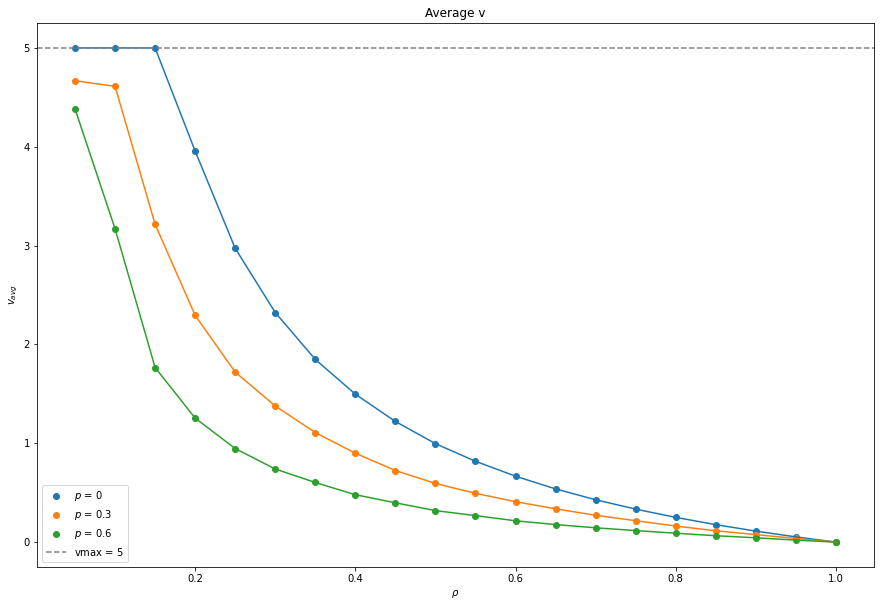

In [340]:
plt.figure(figsize=(15,10))
for i in range(len(mean_for_ps2)):
    plt.scatter(rhos, mean_for_ps2[i], label=f'$p$ = {ps[i]}')
    plt.plot(rhos, mean_for_ps2[i])
plt.axhline(y=5, label='vmax = $5$', color='gray', linestyle='--')
plt.legend()
plt.xlabel('$\\rho$')
plt.ylabel('$v_{avg}$')
plt.title('Average v')
plt.show()

In [16]:
M = 100
n = 100
rhos = np.arange(0.025,0.501,.025)
ps = [0, .3, .6]
mean_for_ps3 = []
for i in ps:
    for_ps_temp3 = []
    for j in rhos:
        mean_temp3 = 0
        print(i,j)
        for _ in range(M):
            temp = FreewayTrafficTwoLines(L = 100, max_v = 5, p = i, rho = j)
            temp.simulate(n)
            mean_temp3 += temp.history[-1][:, 2].mean()
        for_ps_temp3.append(mean_temp3 / M)
    mean_for_ps3.append(for_ps_temp3)

0 0.025
0 0.05
0 0.07500000000000001
0 0.1
0 0.125
0 0.15
0 0.17500000000000002
0 0.2
0 0.225
0 0.25
0 0.275
0 0.30000000000000004
0 0.32500000000000007
0 0.35000000000000003
0 0.37500000000000006
0 0.4
0 0.42500000000000004
0 0.45000000000000007
0 0.47500000000000003
0 0.5
0.3 0.025
0.3 0.05
0.3 0.07500000000000001
0.3 0.1
0.3 0.125
0.3 0.15
0.3 0.17500000000000002
0.3 0.2
0.3 0.225
0.3 0.25
0.3 0.275
0.3 0.30000000000000004
0.3 0.32500000000000007
0.3 0.35000000000000003
0.3 0.37500000000000006
0.3 0.4
0.3 0.42500000000000004
0.3 0.45000000000000007
0.3 0.47500000000000003
0.3 0.5
0.6 0.025
0.6 0.05
0.6 0.07500000000000001
0.6 0.1
0.6 0.125
0.6 0.15
0.6 0.17500000000000002
0.6 0.2
0.6 0.225
0.6 0.25
0.6 0.275
0.6 0.30000000000000004
0.6 0.32500000000000007
0.6 0.35000000000000003
0.6 0.37500000000000006
0.6 0.4
0.6 0.42500000000000004
0.6 0.45000000000000007
0.6 0.47500000000000003
0.6 0.5


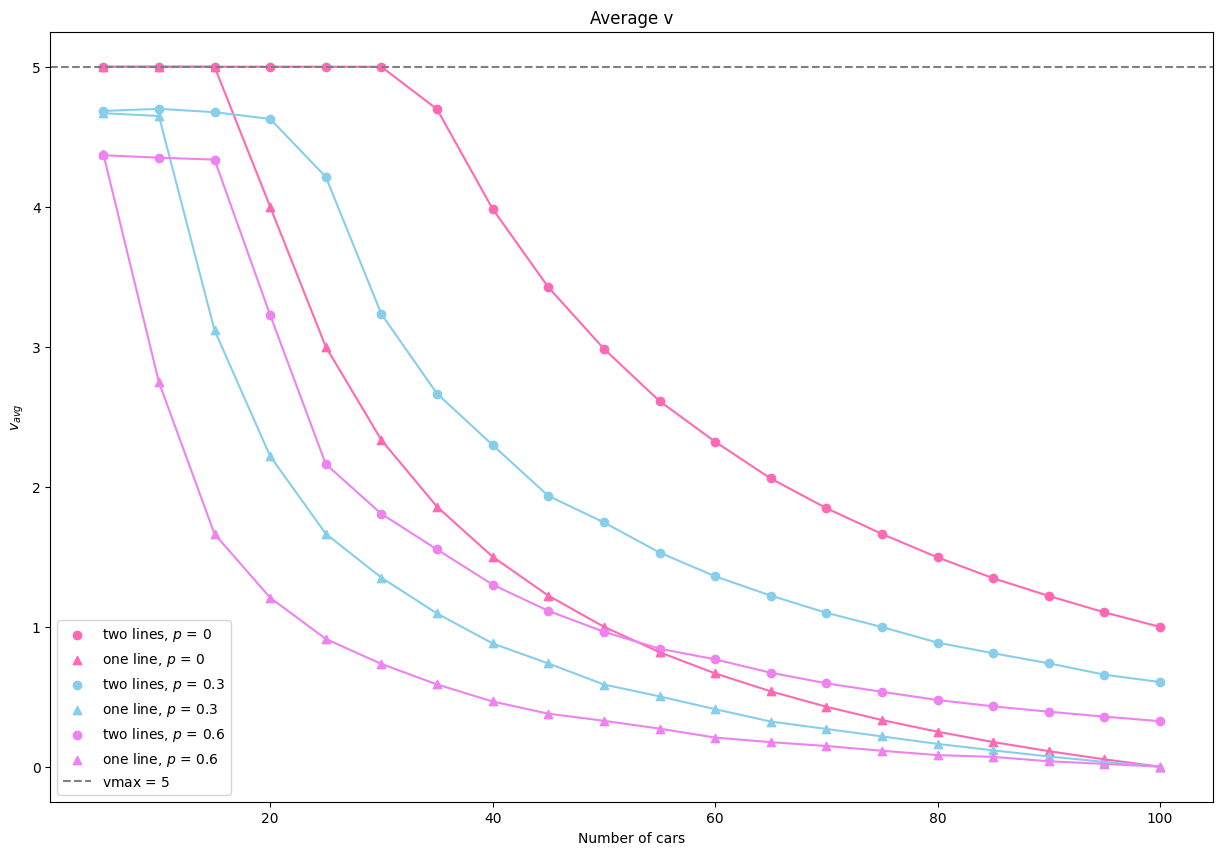

In [18]:
plt.figure(figsize=(15,10))
xs = np.arange(5, 101, 5)
c_l = ['hotpink', 'skyblue', 'violet']
for i in range(len(mean_for_ps3)):
    plt.scatter(xs, mean_for_ps3[i], label=f'two lines, $p$ = {ps[i]}', color = c_l[i])
    plt.plot(xs, mean_for_ps3[i], color = c_l[i])
    plt.scatter(xs, mean_for_ps[i], label=f'one line, $p$ = {ps[i]}', marker='^', color = c_l[i])
    plt.plot(xs, mean_for_ps[i], color = c_l[i])

plt.axhline(y=5, label='vmax = $5$', color='gray', linestyle='--')
plt.legend()
plt.xlabel('Number of cars')
plt.ylabel('$v_{avg}$')
plt.title('Average v')
plt.show()

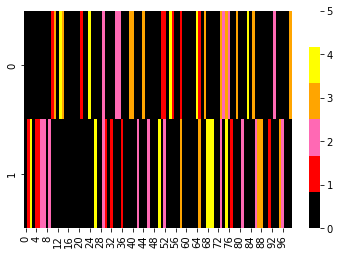

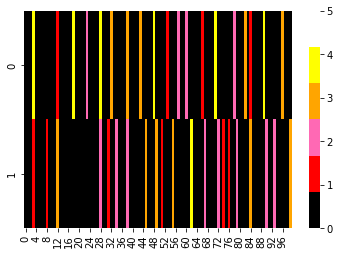

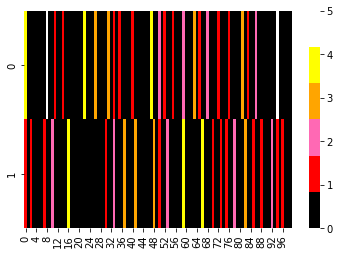

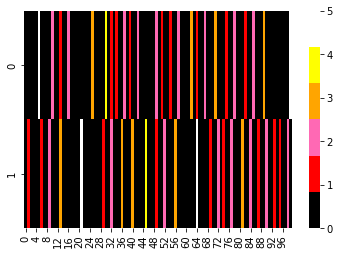

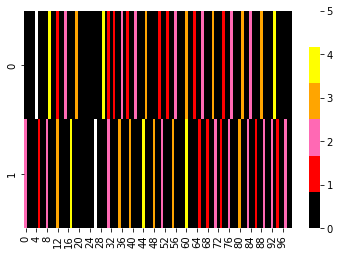

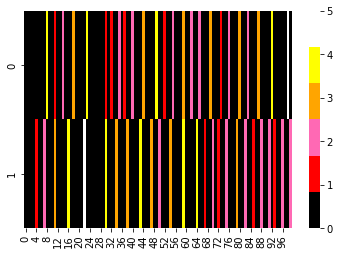

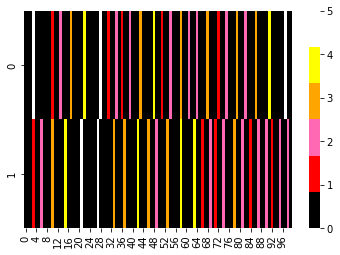

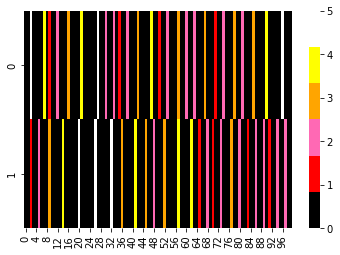

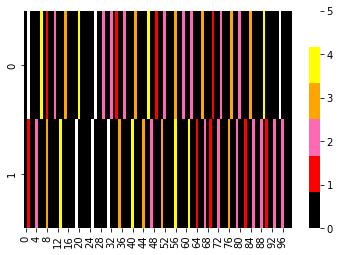

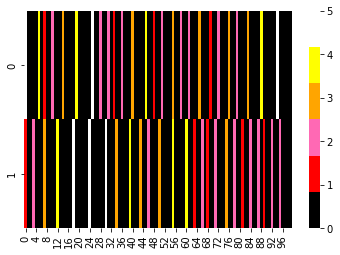

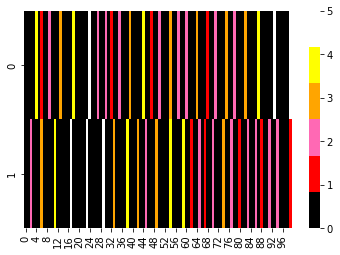

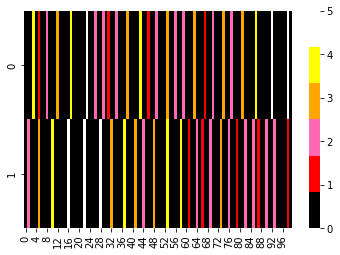

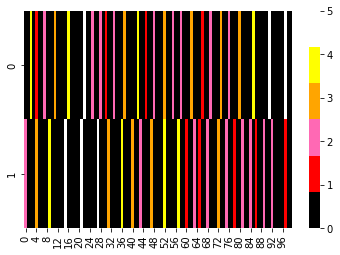

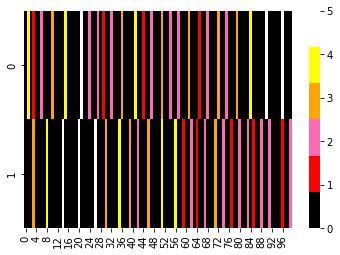

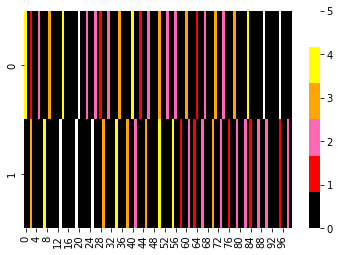

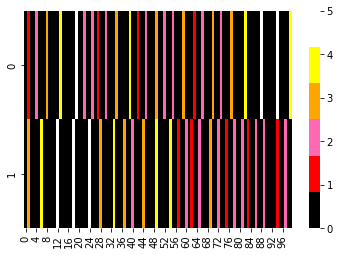

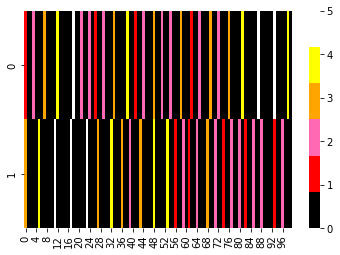

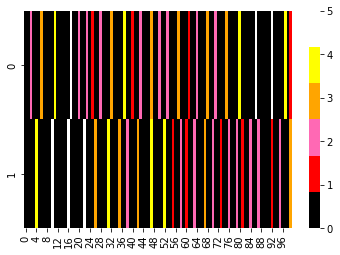

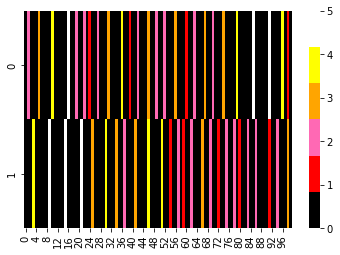

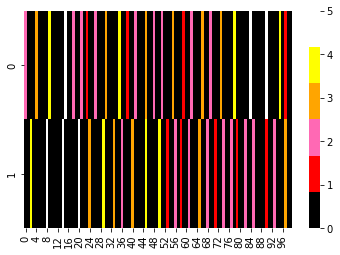

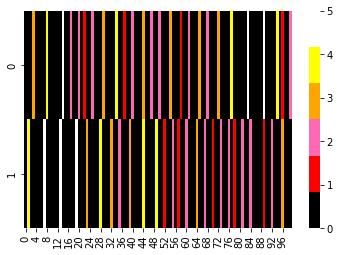

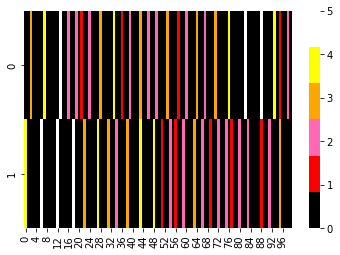

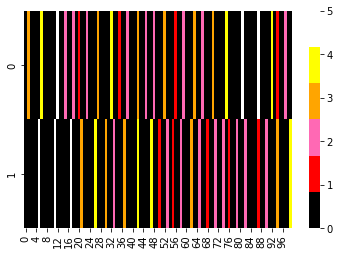

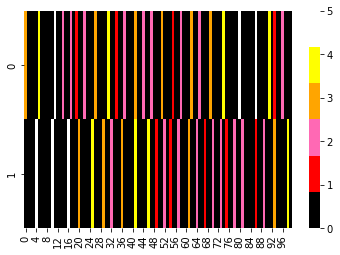

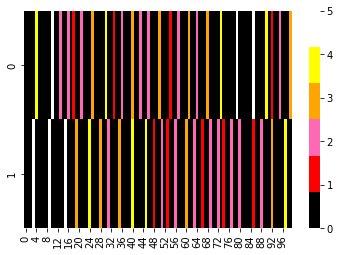

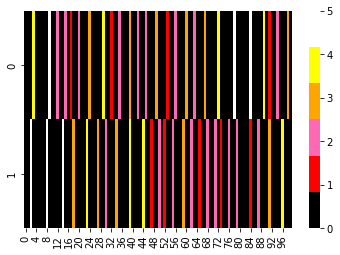

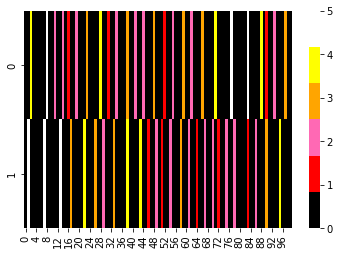

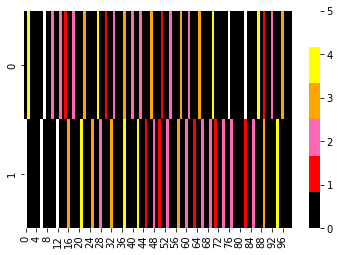

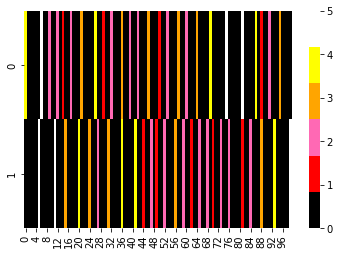

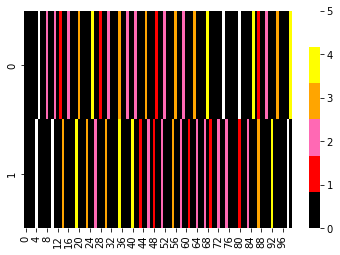

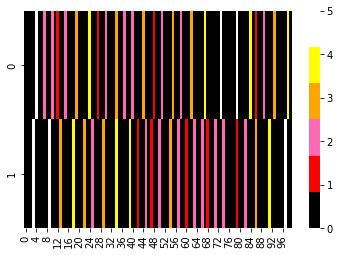

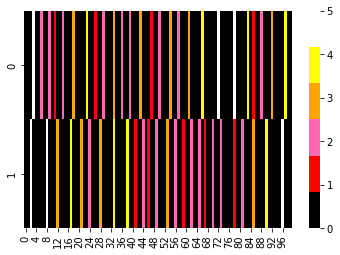

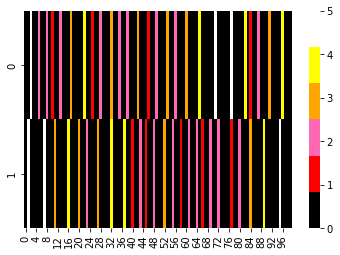

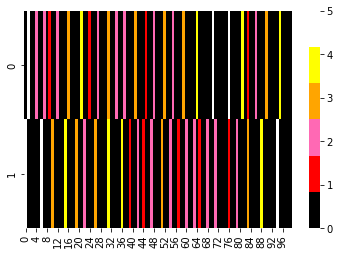

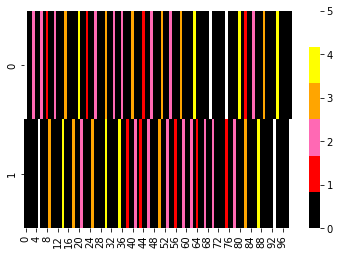

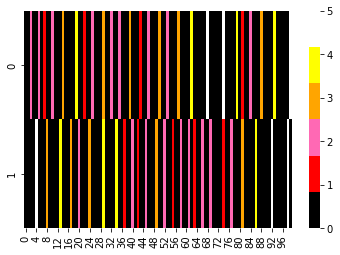

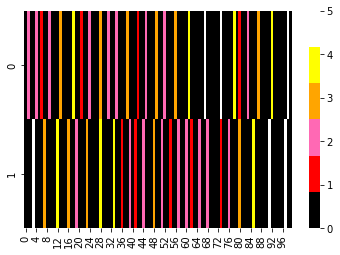

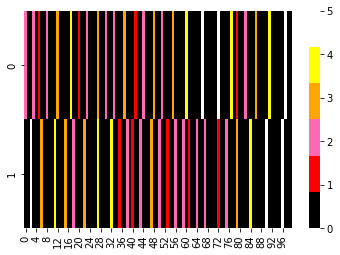

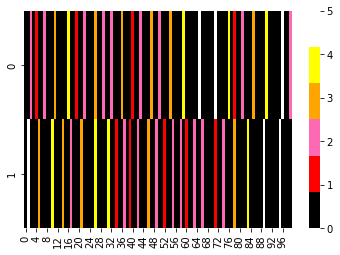

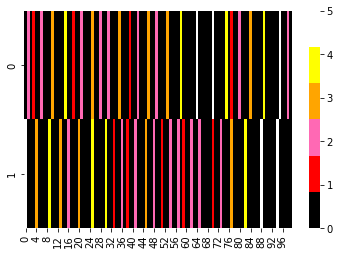

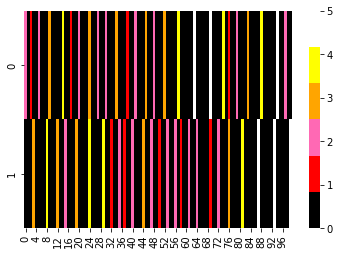

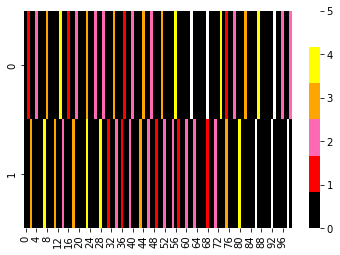

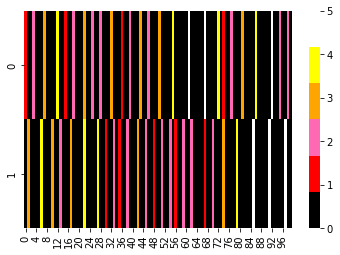

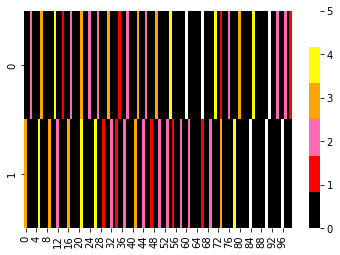

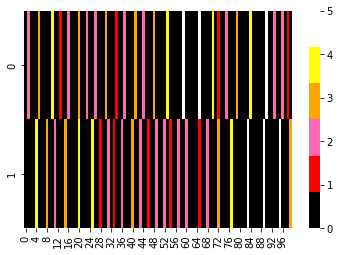

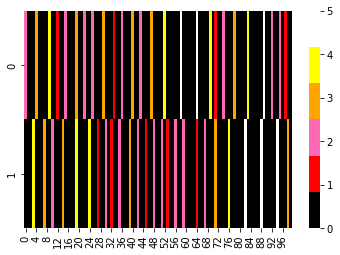

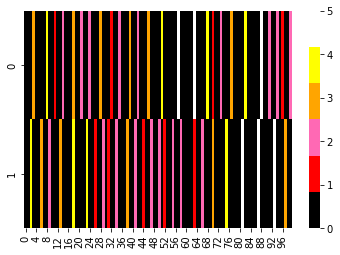

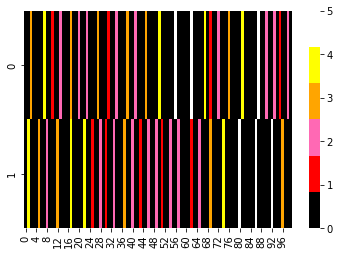

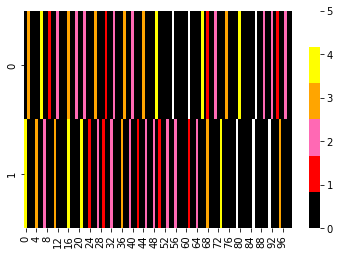

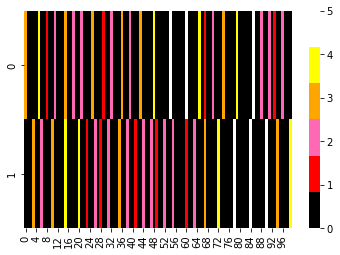

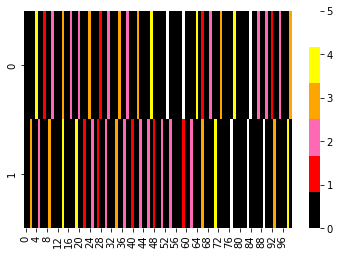

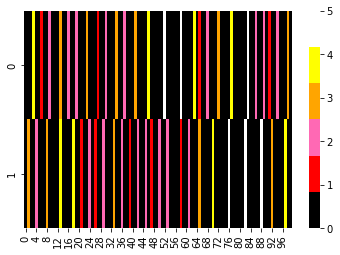

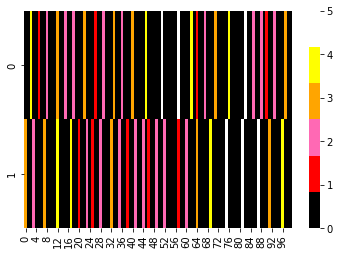

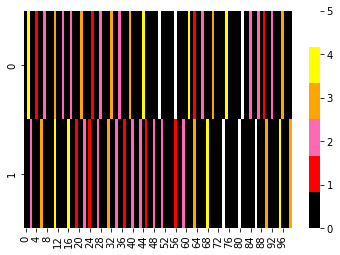

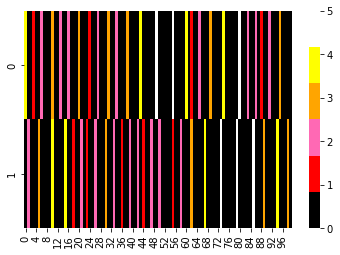

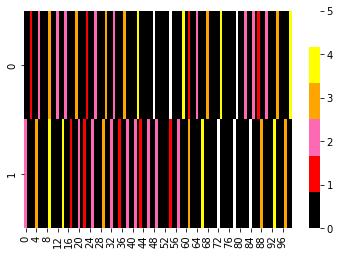

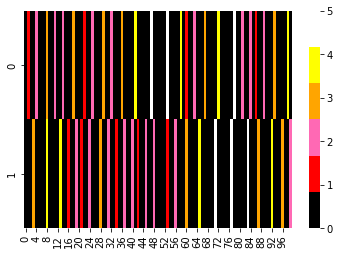

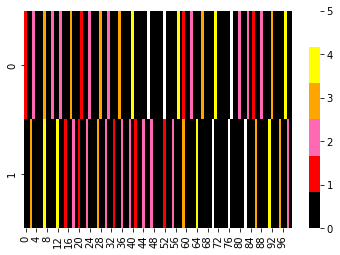

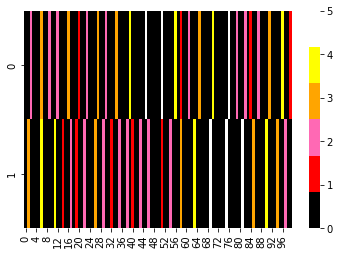

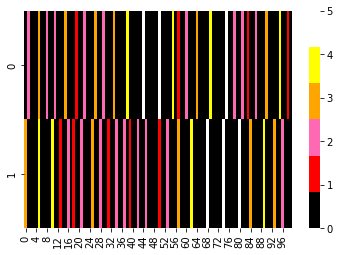

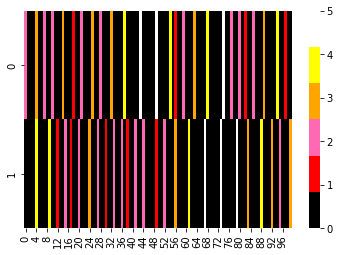

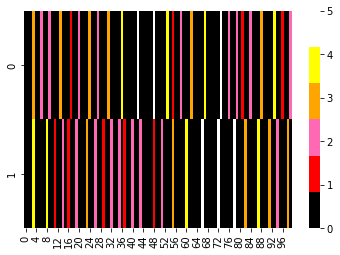

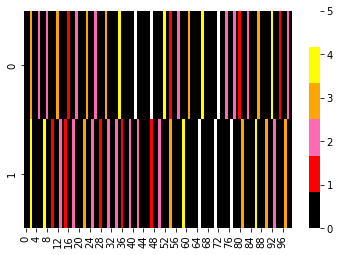

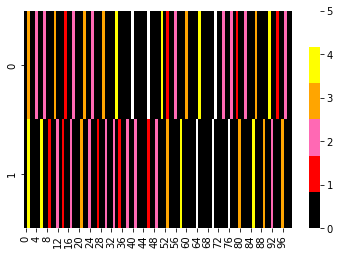

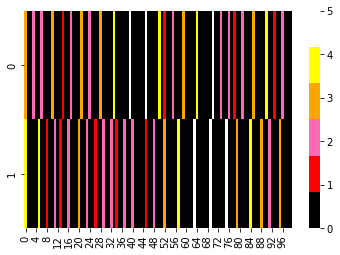

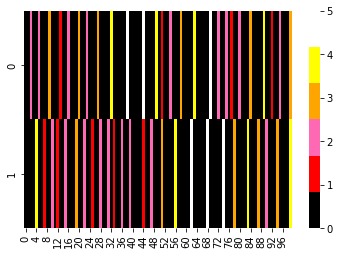

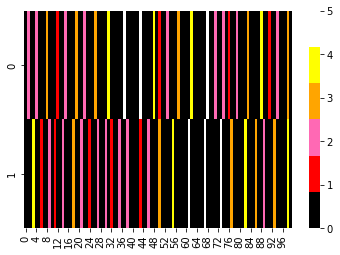

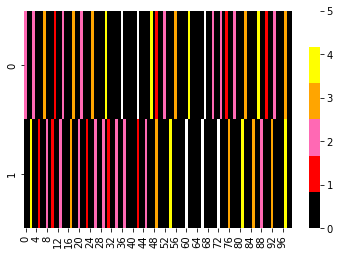

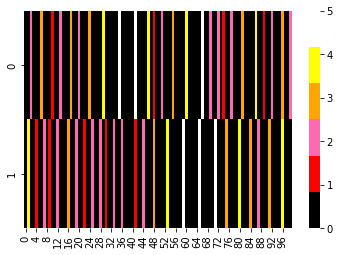

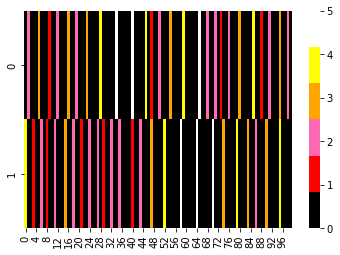

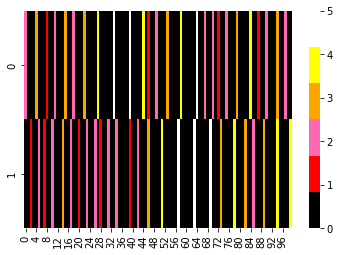

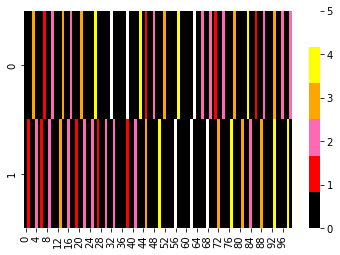

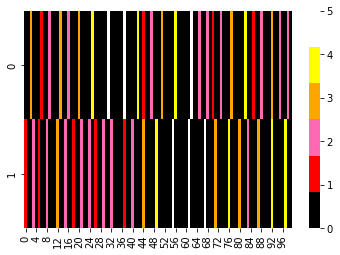

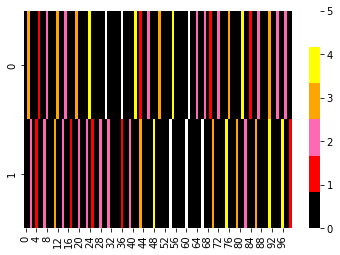

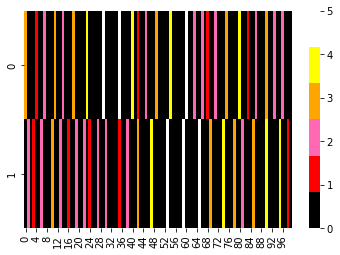

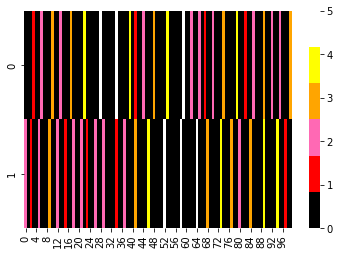

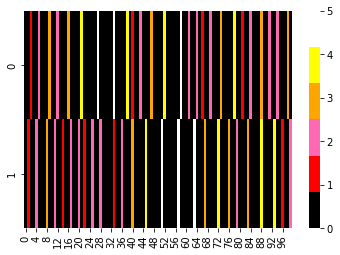

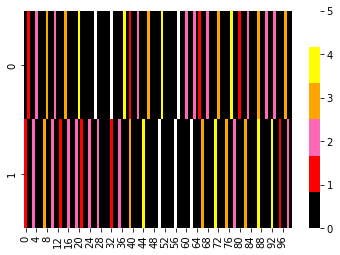

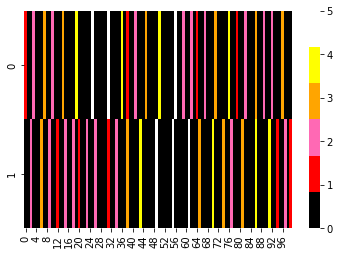

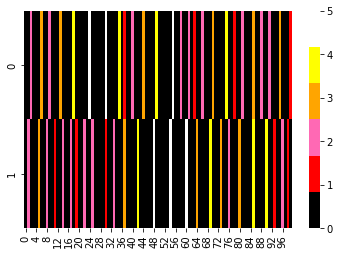

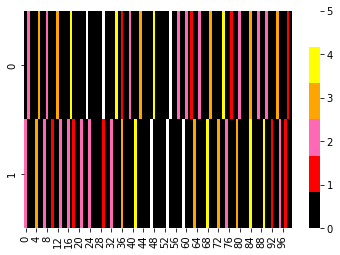

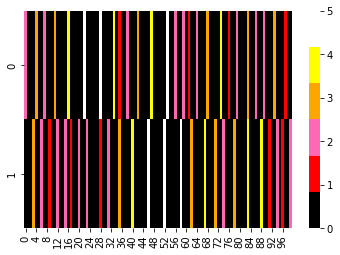

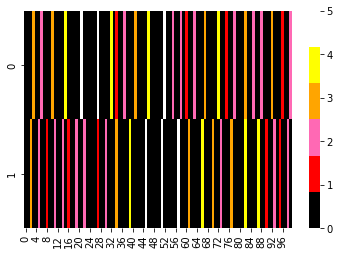

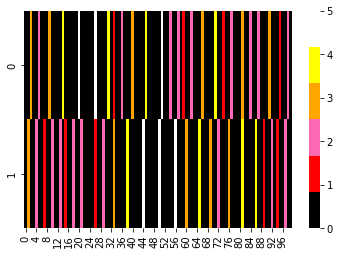

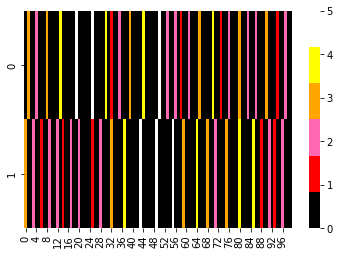

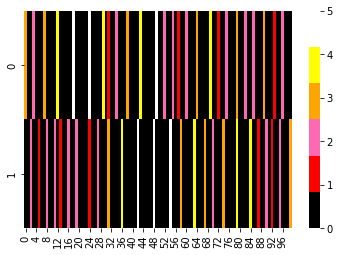

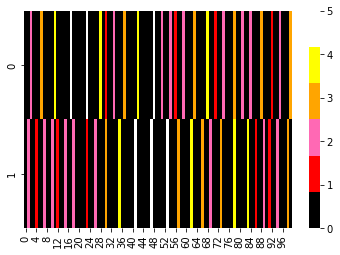

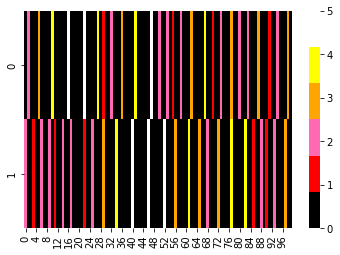

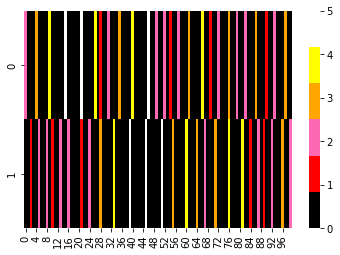

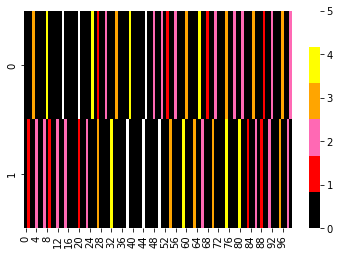

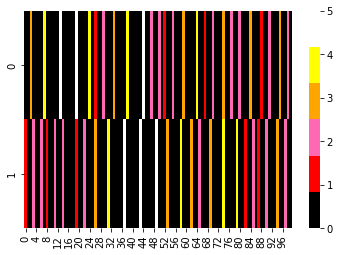

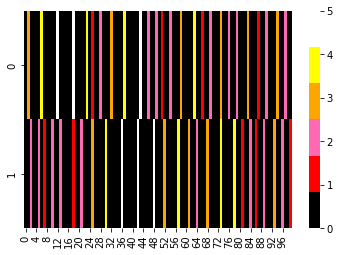

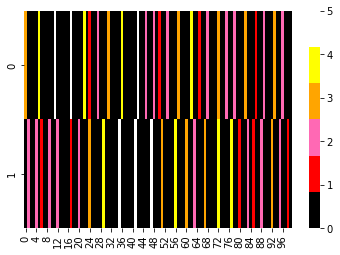

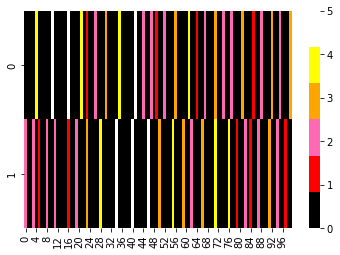

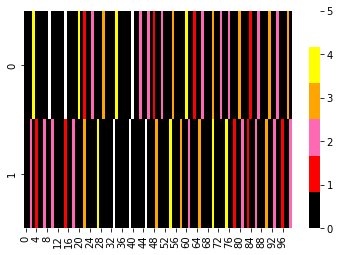

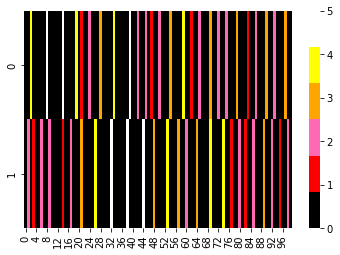

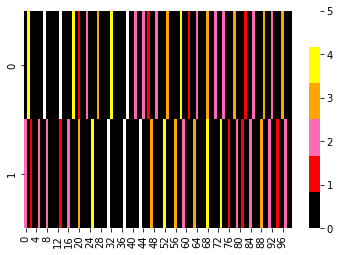

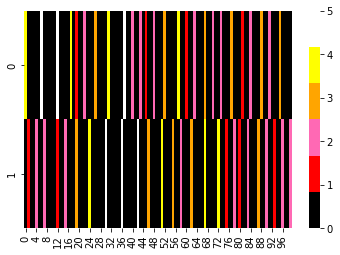

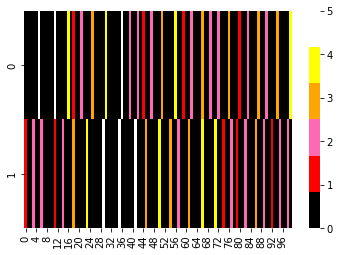

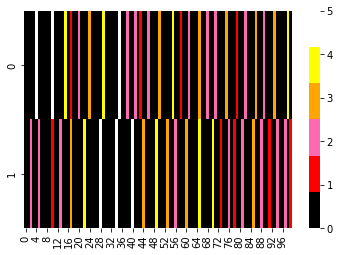

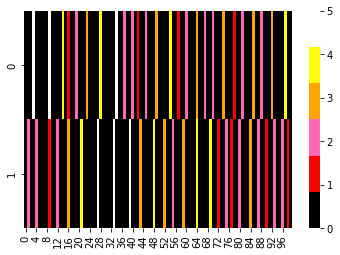

In [261]:
for i in get_views_two(temp):
    sns.heatmap(i, vmin=0, vmax=5, cmap=['black', 'red', 'hotpink', 'orange', 'yellow', 'white'])
    plt.show()